In [3]:
#EQUAÇÕES DIFERENCIAIS COM SYMPY
import sympy as sp
from numpy import linspace
import matplotlib.pyplot as plt
from IPython.display import display

#Definição global da variável 'x' e da função 'y'
x = sp.symbols('x')
y = sp.Function('y')(x)

In [4]:
eq = sp.Eq(y.diff(x, x) - 3*y.diff(x) + 2*y, 0)

display(eq)
print()
display(sp.dsolve(eq))

Eq(2*y(x) - 3*Derivative(y(x), x) + Derivative(y(x), (x, 2)), 0)

Eq(y(x), (C1 + C2*exp(x))*exp(x))

Eq(y(x), (1 - exp(x))*exp(x))

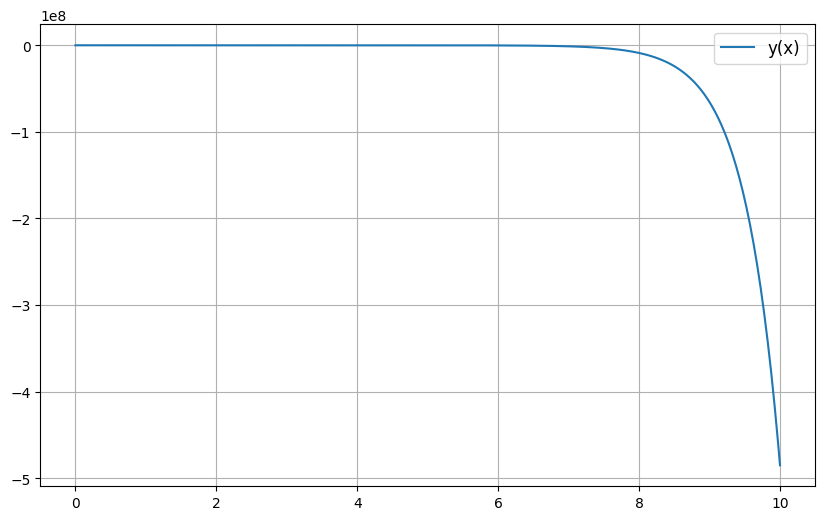

In [5]:
#Resolução de EDO com conduções inicais
eq = sp.Eq(y.diff(x, x) - 3*y.diff(x) + 2*y, 0)

pvi = {y.subs(x, 0): 0, y.diff(x).subs(x, 0): -1}

func = sp.dsolve(eq, ics=pvi)

display(func)

func = func.rhs
func_num = sp.lambdify(x, func, 'numpy')
x_num = linspace(0, 10, 400)
func_num = func_num(x_num)

plt.figure(figsize=(10,6))
plt.plot(x_num, func_num, label=('y(x)'))
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()


In [6]:
eq = sp.Eq(y.diff(x, x) - 8*y.diff(x) + 25*y, 0)

display(sp.dsolve(eq))

Eq(y(x), (C1*sin(3*x) + C2*cos(3*x))*exp(4*x))

In [7]:
eq = sp.Eq(y.diff(x, x) - 8*y.diff(x) + 16*y, 0)

display(sp.dsolve(eq))

Eq(y(x), (C1 + C2*x)*exp(4*x))

In [8]:
eq = sp.Eq(y.diff(x) + 3*y, 2*x)

display(sp.dsolve(eq))

Eq(y(x), C1*exp(-3*x) + 2*x/3 - 2/9)

In [9]:
eq = sp.Eq(y.diff(x), (3*x**2 + 4*x + 2) / (2*y - 2))

pvi = {y.subs(x, 0): -1}

func = sp.dsolve(eq, ics=pvi)

print('Solução Geral:')
display(sp.dsolve(eq)[0])
display(sp.dsolve(eq)[1])
print('Solução com P.V.I.:')
display(func)

Solução Geral:


Eq(y(x), 1 - sqrt(C1 + x**3 + 2*x**2 + 2*x))

Eq(y(x), sqrt(C1 + x**3 + 2*x**2 + 2*x) + 1)

Solução com P.V.I.:


Eq(y(x), 1 - sqrt(x**3 + 2*x**2 + 2*x + 4))

Equação diferencial que modela o fenômeno:


Eq(Derivative(y(x), x), r*(1 - y(x)/k)*y(x))


Solução Geral:


Eq(y(x), k*yo*exp(r*x)/(k + yo*exp(r*x) - yo))

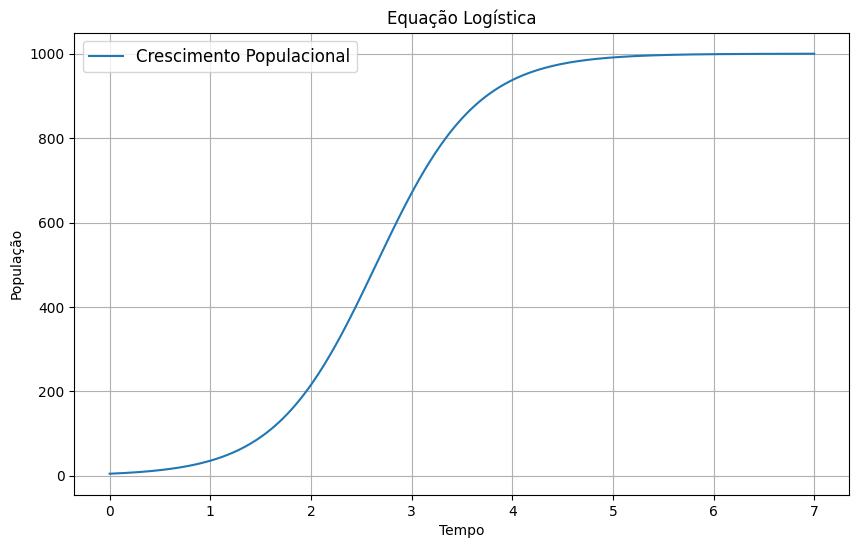

In [10]:
#Exemplo de EDO Equação Logística

k, r, yo = sp.symbols('k, r, yo')

eq = sp.Eq(y.diff(x), r*y*(1 - (y/k)))
pvi = {y.subs(x, 0): yo}
func = sp.dsolve(eq, ics=pvi)

print('Equação diferencial que modela o fenômeno:')
display(eq)
print('\nSolução Geral:')
display(sp.simplify(func))
print()

func_num = func.rhs

func_num = sp.lambdify((x, k, r, yo), func_num, 'numpy')

x_num = linspace(0, 7, 500)
k_num = 1e3
r_num = 2
yo_num = 5

func_num = func_num(x_num, k_num, r_num, yo_num)

plt.figure(figsize=(10,6))
plt.plot(x_num, func_num, label='Crescimento Populacional')
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('Equação Logística')
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.show()


In [11]:
eq = sp.Eq(-y.diff(x), (4*y +2*x - 5)/(6*y + 4*x - 1))
pvi = {y.subs(x, -1): 2}

display(eq)
display(sp.dsolve(eq))
display(sp.dsolve(eq, ics=pvi))

Eq(-Derivative(y(x), x), (2*x + 4*y(x) - 5)/(4*x + 6*y(x) - 1))

[Eq(y(x), -2*x/3 - sqrt(C1 + 4*x**2 + 52*x)/6 + 1/6),
 Eq(y(x), -2*x/3 + sqrt(C1 + 4*x**2 + 52*x)/6 + 1/6)]

Eq(y(x), -2*x/3 + sqrt(4*x**2 + 52*x + 97)/6 + 1/6)

In [12]:
# Definir as variáveis e funções simbólicas
x, y = sp.symbols('x y')
C1 = sp.symbols('C1')
y_func = sp.Function('y')(x)

# Definir a equação diferencial
M = 4*y + 2*x - 5
N = 6*y + 4*x - 1

# Verificar se a equação é exata
dM_dy = sp.diff(M, y)
dN_dx = sp.diff(N, x)

if dM_dy == dN_dx:
    print("A equação é exata")
    
    # Encontrar a função F(x, y)
    F = sp.integrate(M, x) + sp.integrate(N - sp.diff(sp.integrate(M, x), y), y) + C1
    
    # Resolver para C1 usando a condição inicial y(-1) = 2
    F = F.subs(y, y_func)
    C1_value = sp.solve(F.subs([(x, -1), (y_func, 2)]), C1)[0]
    
    # Substituir o valor de C1 na solução geral
    F = F.subs(C1, C1_value)
    
    # Resolver a equação implícita para y(x)
    solution = sp.solve(F, y_func)
    
    # Exibir a solução particular
    display(solution[0])
else:
    print("A equação não é exata e requer outro método para ser resolvida")


A equação é exata


-2*x/3 - sqrt(4*x**2 + 52*x + 36*y(-1)**2 - 60*y(-1) + 73)/6 + 1/6

In [13]:
Y = sp.symbols('Y')
eq = sp.Eq(4*Y*x + x**2 - 5*x + 3*Y**2 - Y, 8)
display(eq)
display(sp.solve(eq, Y)[0])
display(sp.solve(eq, Y)[1])

Eq(3*Y**2 + 4*Y*x - Y + x**2 - 5*x, 8)

-2*x/3 - sqrt(4*x**2 + 52*x + 97)/6 + 1/6

-2*x/3 + sqrt(4*x**2 + 52*x + 97)/6 + 1/6